In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier


In [2]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 75.1 MB/s eta 0:00:00


In [2]:
import xgboost
import sklearn
print(xgboost.__version__)
print(sklearn.__version__)


2.1.3
1.5.2


In [3]:
# Load data
data = pd.read_csv('/content/loan_data_set.csv')



In [4]:
# Step 1: Data Cleaning
# Drop irrelevant column
if 'Loan_ID' in data.columns:
    data = data.drop('Loan_ID', axis=1)

# Fill missing values
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

In [5]:
# Step 2: Data Preprocessing
# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 3: Feature Engineering (if needed)
# Combine incomes for a new feature
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data = data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [6]:
# Step 4: Normalize the dataset
scaler = StandardScaler()
data[['LoanAmount', 'Loan_Amount_Term', 'Total_Income']] = scaler.fit_transform(
    data[['LoanAmount', 'Loan_Amount_Term', 'Total_Income']]
)

# Step 5: Data Transformation
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression: 0.8107
Random Forest: 0.7984
SVM: 0.8148
K-Nearest Neighbors: 0.7332
Decision Tree: 0.7129


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:08:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:08:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:08:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:08:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:08:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: 0.7842


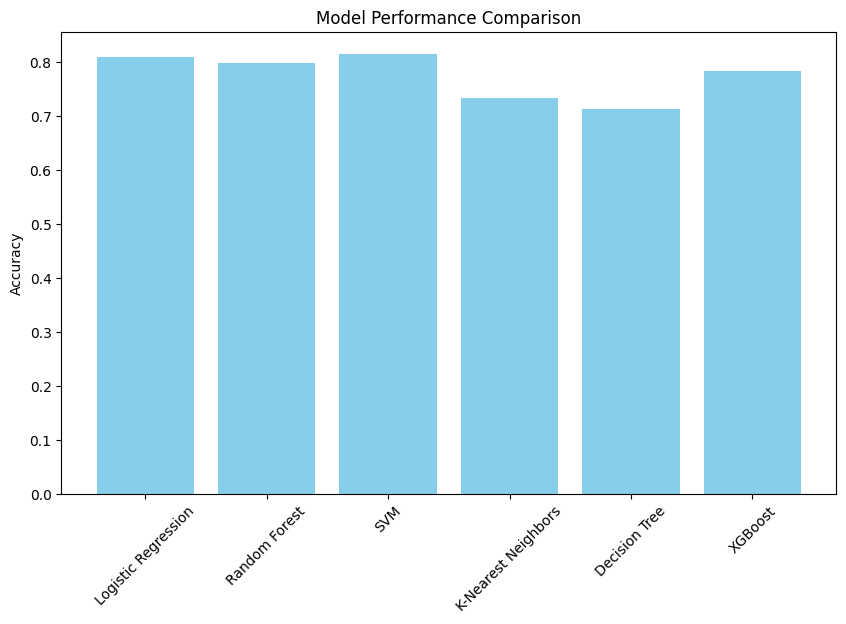

In [7]:
# Step 6: Model Evaluation
# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate each model using cross-validation
results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    results[name] = np.mean(scores)
    print(f"{name}: {np.mean(scores):.4f}")

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

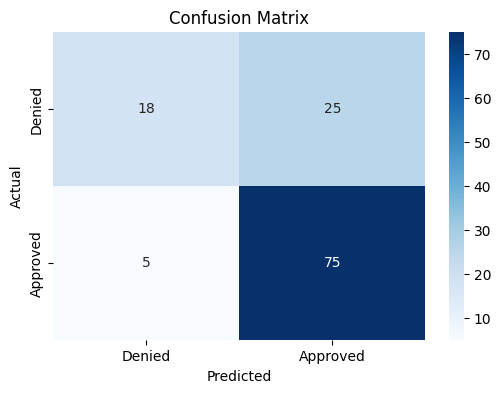

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


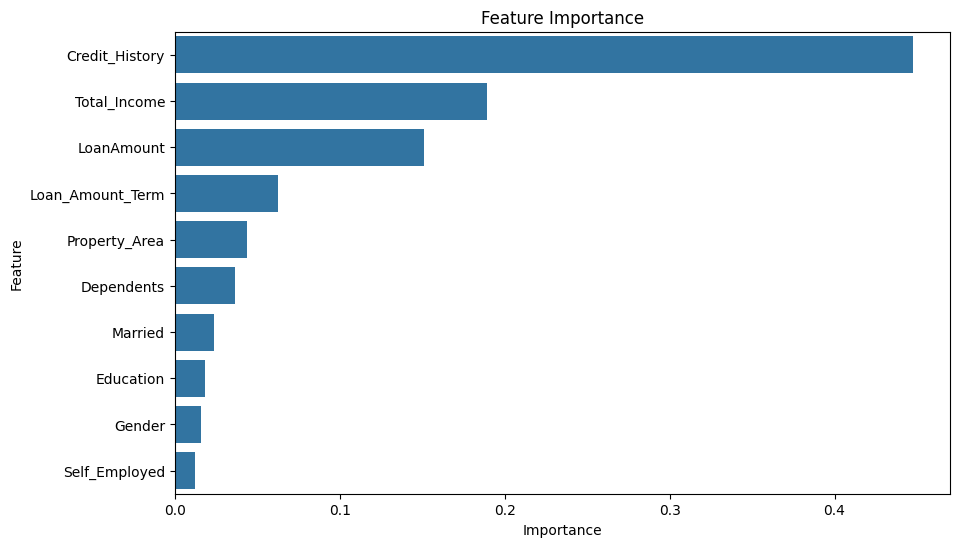

In [11]:
# Feature Importance (if applicable)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df)
    plt.title("Feature Importance")
    plt.show()

In [10]:
# Function for predicting loan eligibility based on user input
def predict_loan_eligibility1():
    print("Enter the following details:")
    user_input = {
        'Gender': input("Gender (Male/Female): "),
        'Married': input("Married (Yes/No): "),
        'Dependents': input("Dependents (0/1/2/3+): "),
        'Education': input("Education (Graduate/Not Graduate): "),
        'Self_Employed': input("Self Employed (Yes/No): "),
        'ApplicantIncome': float(input("Applicant Income: ")),
        'CoapplicantIncome': float(input("Coapplicant Income: ")),
        'LoanAmount': float(input("Loan Amount: ")),
        'Loan_Amount_Term': float(input("Loan Amount Term: ")),
        'Credit_History': float(input("Credit History (1.0/0.0): ")),
        'Property_Area': input("Property Area (Urban/Semiurban/Rural): ")
    }

    input_df = pd.DataFrame([user_input])

    # Encode categorical variables
    for col, le in label_encoders.items():
        if col in input_df.columns:
            input_df[col] = le.transform(input_df[col])

    # Combine incomes for Total_Income feature before scaling
    input_df['Total_Income'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    input_df = input_df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

    # Reindex and scale the input
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    numerical_features = ['LoanAmount', 'Loan_Amount_Term', 'Total_Income']
    input_df[numerical_features] = scaler.transform(input_df[numerical_features])

    # Make prediction
    prediction = best_model.predict(input_df)
    return "Loan Approved" if prediction[0] == 1 else "Loan Denied"

# Prompt user for input and predict eligibility
result = predict_loan_eligibility1()
print("Prediction:", result)


Enter the following details:
Gender (Male/Female): Male
Married (Yes/No): Yes
Dependents (0/1/2/3+): 3+
Education (Graduate/Not Graduate): Graduate
Self Employed (Yes/No): Yes
Applicant Income: 1200000
Coapplicant Income: 0
Loan Amount: 60000000
Loan Amount Term: 360
Credit History (1.0/0.0): 1.0
Property Area (Urban/Semiurban/Rural): Semiurban
Prediction: Loan Approved
